# Installing relevant packages

In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


# Importing

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from nltk.stem.porter import PorterStemmer
import nltk
import re, string
from nltk.corpus import stopwords
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics

# Loading Data

In [8]:
url = 'Dataset for Detection of Cyber-Trolls.json'
df = pd.read_json(url, lines= True,orient='columns')
df.head

<bound method NDFrame.head of                                                  content  \
0                                 Get fucking real dude.   
1       She is as dirty as they come  and that crook ...   
2       why did you fuck it up. I could do it all day...   
3       Dude they dont finish enclosing the fucking s...   
4       WTF are you talking about Men? No men thats n...   
...                                                  ...   
19996    I dont. But what is complaining about it goi...   
19997   Bahah  yeah i&;m totally just gonna&; get pis...   
19998       hahahahaha >:) im evil mwahahahahahahahahaha   
19999            What&;s something unique about Ohio? :)   
20000              Who is the biggest gossiper you know?   

                          annotation  extras  
0      {'notes': '', 'label': ['1']}     NaN  
1      {'notes': '', 'label': ['1']}     NaN  
2      {'notes': '', 'label': ['1']}     NaN  
3      {'notes': '', 'label': ['1']}     NaN  
4      {'notes

In [9]:
for i in range(0, len(df)):
    if df.annotation[i]['label'][0] == '1':
        df.loc[i, 'annotation'] = 1
    else:
        df.loc[i, 'annotation'] = 0


In [10]:
df.drop(['extras'],axis = 1,inplace = True)
df

,content,annotation
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


In [11]:
df.shape 

(20001, 2)

# Visualization

<AxesSubplot:>

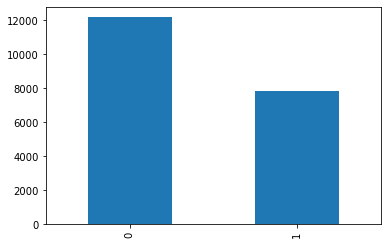

In [12]:
df['annotation'].value_counts().sort_index().plot.bar()

In [13]:
#Biasness
print("PosiNon cyber trollingtive: ", df.annotation.value_counts()[0]/len(df.annotation)*100,"%")
print("Cybertrolling: ", df.annotation.value_counts()[1]/len(df.annotation)*100,"%")

PosiNon cyber trollingtive:  60.89195540222989 %
Cybertrolling:  39.10804459777012 %


In [14]:
nltk.download('stopwords')
stop = stopwords.words('english')

regex = re.compile('[%s]' % re.escape(string.punctuation))

def test_re(s):
    return regex.sub('', s)

df['content_without_stopwords'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['content_without_puncs'] = df['content_without_stopwords'].apply(lambda x: regex.sub('',x))
del df['content_without_stopwords']
del df['content']
df


[nltk_data] Downloading package stopwords to C:\Users\Deepak
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,annotation,content_without_puncs
0,1,Get fucking real dude
1,1,She dirty come crook Rengel Dems fucking corru...
2,1,fuck up I could day too Lets hour Ping later s...
3,1,Dude dont finish enclosing fucking showers I h...
4,1,WTF talking Men No men thats menage thats gay
...,...,...
19996,0,I dont But complaining going do
19997,0,Bahah yeah im totally gonna get pissed talking...
19998,0,hahahahaha im evil mwahahahahahahahahaha
19999,0,Whats something unique Ohio


# Preprocessing

In [15]:
#Stemming
porter_stemmer = PorterStemmer()
#punctuations
nltk.download('punkt')
tok_list = []
size = df.shape[0]

for i in range(size):
  word_data = df['content_without_puncs'][i]
  nltk_tokens = nltk.word_tokenize(word_data)
  final = ''
  for w in nltk_tokens:
    final = final + ' ' + porter_stemmer.stem(w)
  tok_list.append(final)

df['content_tokenize'] = tok_list
del df['content_without_puncs']
df

[nltk_data] Downloading package punkt to C:\Users\Deepak
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,annotation,content_tokenize
0,1,get fuck real dude
1,1,she dirti come crook rengel dem fuck corrupt ...
2,1,fuck up i could day too let hour ping later s...
3,1,dude dont finish enclos fuck shower i hate ha...
4,1,wtf talk men no men that menag that gay
...,...,...
19996,0,i dont but complain go do
19997,0,bahah yeah im total gon na get piss talk you ...
19998,0,hahahahaha im evil mwahahahahahahahahaha
19999,0,what someth uniqu ohio


In [16]:
noNums = []
for i in range(len(df)):
  noNums.append(''.join([i for i in df['content_tokenize'][i] if not i.isdigit()]))

df['content'] = noNums
df

,annotation,content_tokenize,content
0,1,get fuck real dude,get fuck real dude
1,1,she dirti come crook rengel dem fuck corrupt ...,she dirti come crook rengel dem fuck corrupt ...
2,1,fuck up i could day too let hour ping later s...,fuck up i could day too let hour ping later s...
3,1,dude dont finish enclos fuck shower i hate ha...,dude dont finish enclos fuck shower i hate ha...
4,1,wtf talk men no men that menag that gay,wtf talk men no men that menag that gay
...,...,...,...
19996,0,i dont but complain go do,i dont but complain go do
19997,0,bahah yeah im total gon na get piss talk you ...,bahah yeah im total gon na get piss talk you ...
19998,0,hahahahaha im evil mwahahahahahahahahaha,hahahahaha im evil mwahahahahahahahahaha
19999,0,what someth uniqu ohio,what someth uniqu ohio


In [17]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True, sublinear_tf=True)
tfIdf = tfIdfVectorizer.fit_transform(df.content.tolist())

In [18]:
print(tfIdf)

  (0, 3599)	0.5682792040556577
  (0, 10536)	0.6408032598619846
  (0, 4666)	0.3314842764826402
  (0, 4897)	0.3956616014132561
  (1, 7498)	0.1421522208901913
  (1, 7671)	0.18997382467613527
  (1, 10709)	0.3380770158779807
  (1, 7870)	0.17712641457020445
  (1, 6882)	0.2707206754001475
  (1, 2650)	0.3478358132370042
  (1, 3128)	0.36956626902789813
  (1, 10688)	0.36956626902789813
  (1, 2792)	0.3609013757539863
  (1, 2454)	0.20014266836955738
  (1, 3307)	0.294004579420996
  (1, 11404)	0.24231137330135857
  (1, 4666)	0.12302268120056382
  (2, 5649)	0.26264752682375
  (2, 1476)	0.2858475342270202
  (2, 14422)	0.28761927584628644
  (2, 11158)	0.4130661580674724
  (2, 7318)	0.3061308801267633
  (2, 9786)	0.38298243181872793
  (2, 5957)	0.28144866948736874
  (2, 7435)	0.24199503289435126
  :	:
  (19997, 8529)	0.362558005670761
  (19997, 14529)	0.1829917686470462
  (19997, 364)	0.2524980709313037
  (19997, 8634)	0.19487099515279527
  (19997, 5040)	0.21529577669215724
  (19997, 14641)	0.1516281744

In [19]:
print(tfIdf.shape) # means total rows  20001 with 14783 features

(20001, 14785)


In [20]:
df2 = pd.DataFrame(tfIdf[2].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"]) #for second entry only(just to check if working)
df2 = df2.sort_values('TF-IDF', ascending=False)
print (df2.head(10))

         TF-IDF
sched  0.413066
ping   0.382982
later  0.306131
write  0.287619
book   0.285848
hour   0.281449
here   0.262648
let    0.241995
up     0.237401
could  0.223151


C:\Users\Deepak Singh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
dfx = pd.DataFrame(tfIdf.toarray(), columns = tfIdfVectorizer.get_feature_names())
print(dfx)

        aa  aaaaaaaaaa  aaaaaanndgummi  aaaagh  aaaawwwww  aaand  \
0      0.0         0.0             0.0     0.0        0.0    0.0   
1      0.0         0.0             0.0     0.0        0.0    0.0   
2      0.0         0.0             0.0     0.0        0.0    0.0   
3      0.0         0.0             0.0     0.0        0.0    0.0   
4      0.0         0.0             0.0     0.0        0.0    0.0   
...    ...         ...             ...     ...        ...    ...   
19996  0.0         0.0             0.0     0.0        0.0    0.0   
19997  0.0         0.0             0.0     0.0        0.0    0.0   
19998  0.0         0.0             0.0     0.0        0.0    0.0   
19999  0.0         0.0             0.0     0.0        0.0    0.0   
20000  0.0         0.0             0.0     0.0        0.0    0.0   

       aaanyyywhoooooooo  aaargh  aaarrrg  aah  ...  zon  zone  zoo  zoom  \
0                    0.0     0.0      0.0  0.0  ...  0.0   0.0  0.0   0.0   
1                    0.0     

C:\Users\Deepak Singh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
def display_scores(vectorizer, tfidf_result):
    scores = zip(vectorizer.get_feature_names(),
                 np.asarray(tfidf_result.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    i=0
    for item in sorted_scores:
        print ("{0:50} Score: {1}".format(item[0], item[1]))
        i = i+1
        if (i > 25):
          break

In [23]:
#top 25 words
display_scores(tfIdfVectorizer, tfIdf)

hate                                               Score: 533.8155899183665
fuck                                               Score: 503.761027940121
damn                                               Score: 482.3766280806648
suck                                               Score: 407.3775243830333
ass                                                Score: 337.54063310904644
that                                               Score: 311.6248067321706
lol                                                Score: 297.99576995024535
im                                                 Score: 296.02151699066417
like                                               Score: 287.81819684009247
you                                                Score: 284.7844198654016
it                                                 Score: 254.7571429454036
get                                                Score: 253.13900797210226
what                                               Score: 221.4366431927156
know    

C:\Users\Deepak Singh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
X=tfIdf.toarray()
y = np.array(df.annotation.tolist())
#Spltting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16000, 14785)
(16000,)
(4001, 14785)
(4001,)


In [25]:
#Training data biasness
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [9750 6250]]


In [26]:
#Test Data
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [2429 1572]]


In [27]:
#Random oversampling on training data
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [28]:
print(X_over.shape)
print(y_over.shape)

(19500, 14785)
(19500,)


In [29]:
unique_elements, counts_elements = np.unique(y_over, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [9750 9750]]


# Training and Calculating Scores

In [30]:
def preprocess_input(input_text):
    # Remove punctuation and convert to lowercase
    input_text = input_text.lower()
    input_text = re.sub(f"[{re.escape(string.punctuation)}]", "", input_text)
    
    # Tokenize and remove stopwords
    tokens = nltk.word_tokenize(input_text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # Stem the words
    porter_stemmer = PorterStemmer()
    tokens = [porter_stemmer.stem(word) for word in tokens]
    
    return " ".join(tokens)

# Function to display statistics and visualizations
def display_stats_and_visualizations(model, X_test, y_test):
    print(classification_report(y_test, y_pred))
    
    disp = plot_precision_recall_curve(model, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
        disp.average_precision))
    
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    
    plt.figure()
    plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()


## Normal Methods

Accuracy:  0.799550112471882
Confusion Matrix: 
 [[1911  518]
 [ 284 1288]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      2429
           1       0.71      0.82      0.76      1572

    accuracy                           0.80      4001
   macro avg       0.79      0.80      0.79      4001
weighted avg       0.81      0.80      0.80      4001



C:\Users\Deepak Singh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


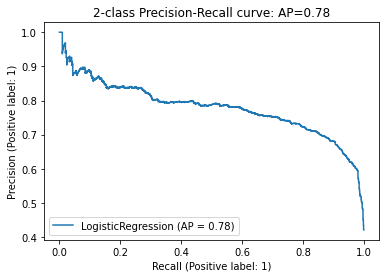

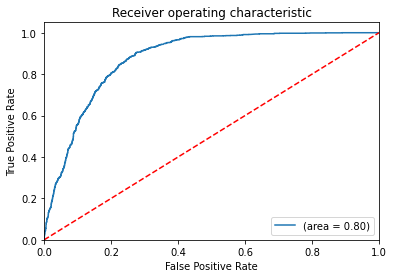

In [31]:
lgr = LogisticRegression()
lgr.fit(X_over, y_over)

# Make predictions on the test data
y_pred = lgr.predict(X_test)

# Print accuracy and confusion matrix
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

# Display additional statistics and visualizations
display_stats_and_visualizations(lgr, X_test, y_test)

In [32]:

user_input = input("Enter a text (or 'exit' to quit): ")
    
    
    # Preprocess the user input
preprocessed_input = preprocess_input(user_input)
    
    # Create a DataFrame to match the format expected by your TF-IDF vectorizer
data = {'content': [preprocessed_input]}
user_df = pd.DataFrame(data)
    
    # Transform the user input using the vectorizer
tfidf_result = tfIdfVectorizer.transform(user_df['content'])
    
    # Make a prediction using your trained model
prediction = lgr.predict(tfidf_result)
    
    # Display the prediction
if prediction == 1:
    print("Result: Cyberbullying")
    
else:
    print("Result: Not Cyberbullying")
        
        

Enter a text (or 'exit' to quit): dick
Result: Cyberbullying


In [33]:
# gnb = GaussianNB()
# gnb_model = gnb.fit(X_over, y_over)

# # Make predictions on the test data with GNB
# y_pred_gnb = gnb_model.predict(X_test)

# # Print accuracy and confusion matrix for GNB
# print("GNB Accuracy: ", metrics.accuracy_score(y_test, y_pred_gnb))
# print("GNB Confusion Matrix: \n", confusion_matrix(y_test, y_pred_gnb))

# # Display additional statistics and visualizations for GNB
# display_stats_and_visualizations(gnb, X_test, y_test)

In [34]:
# rfc = RandomForestClassifier(verbose=True) 
# rfcmodel = rfc.fit(X_over, y_over)
# y_pred = rfc.predict(X_test)
# print ("Score:", rfcmodel.score(X_test, y_test))
# print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
# display_stats_and_visualizations(rfc, X_test, y_test)

In [35]:

# user_input = input("Enter a text (or 'exit' to quit): ")
    
    
#     # Preprocess the user input
# preprocessed_input = preprocess_input(user_input)
    
#     # Create a DataFrame to match the format expected by your TF-IDF vectorizer
# data = {'content': [preprocessed_input]}
# user_df = pd.DataFrame(data)
    
#     # Transform the user input using the vectorizer
# tfidf_result = tfIdfVectorizer.transform(user_df['content'])
    
#     # Make a prediction using your trained model
# prediction = rfc.predict(tfidf_result)
    
#     # Display the prediction
# if prediction == 1:
#     print("Result: Cyberbullying")
    
# else:
#     print("Result: Not Cyberbullying")
        
        

In [37]:
joblib.dump(lgr, 'random_forest_model1.pkl')

['random_forest_model1.pkl']

In [38]:
tfIdfVectorizer = TfidfVectorizer(use_idf=True, sublinear_tf=True)
tfIdf = tfIdfVectorizer.fit_transform(df.content.tolist())

# Save the TF-IDF vectorizer
joblib.dump(tfIdfVectorizer, 'tfidf_vectorizer1.pkl')


['tfidf_vectorizer1.pkl']